In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/concentrated_new/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/rmg_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/dirac_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/concentrated_new/concentrated_BC.jl")

state_coefficients (generic function with 1 method)

In [177]:
# general parameters
pd = 50
kappa = 1
w = sqrt(3) * kappa
spacing = 0.5 * (w / 2 / pd)

0.008660254037844387

In [178]:
# RMG parameters
a = 4*pi/(3*kappa)
uD = 10
t0 = 3
t1 = 5
t2 = -0.21
t3 = 0
t4 = 0
Nl = 3
index = 2

2

In [179]:
# 3-patch parameters
delta = -1
vF = 0

0

<font size="12">BC Decoupling</font>

In [180]:
alpha_list = (5) * [exp(pi/3 * im), exp(pi/4 * im), exp(pi/2 * im)]
# alpha_list = exp(im * pi/2) * [0, 10^6, 10^8, 10^10]

3-element Vector{ComplexF64}:
    2.5000000000000004 + 4.330127018922193im
    3.5355339059327378 + 3.5355339059327373im
 3.061616997868383e-16 + 5.0im

In [195]:
function rmg_decoupled_comp(pd, w, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha_list)
    # get an mBZ centered at the kappa-point
    grid_sor = make_hex([kappa, 0], w / 2, w / 2 / pd)

    grid_patch = make_hex([0, 0], w / 2, w / 2 / pd)

    fig = Figure(size=(2400, 800 * length(alpha_list)), fontsize=25)

    for j in 1:length(alpha_list)
        alpha = alpha_list[j]
        sor_bc = rmg_spinor_bc(grid_sor, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index) .+ 
        bc_no_spinors(grid_patch, spacing, vF, kappa, delta, alpha)[1]

        patch_bc = rmg_patch_bc(grid_patch, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)

        # pure_spinor_bc = rmg_spinor_bc(grid_sor, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index)

        mass = uD * (index + 1 - (1/2) * (Nl - 1))

        pure_spinor_bc = dirac_patch_bc(grid_patch, spacing, (3/2) * a * t0, mass, 1, kappa, vF, delta, alpha)

        ax1 = Axis(fig[j, 1], title = string(round(angle(alpha) / pi, sigdigits=3)), 
        xlabel = L"k_x", ylabel = L"k_y")
        tricontourf!(ax1, grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
        X, ax1, tr1 = tricontourf(grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
        cb1 = Colorbar(fig[j, 2], tr1)

        ax3 = Axis(fig[j, 3], title = string(round(angle(alpha) / pi, sigdigits=3))
        , xlabel = L"k_x", ylabel = L"k_y")
        tricontourf!(ax3, grid_patch[:, 1], grid_patch[:, 2], sor_bc, colormap = :Spectral)
        X, ax3, tr3 = tricontourf(grid_patch[:, 1], grid_patch[:, 2], sor_bc, colormap = :Spectral)
        cb3 = Colorbar(fig[j, 4], tr3)

        ax5 = Axis(fig[j, 5], title = string(round(angle(alpha) / pi, sigdigits=3))
        , xlabel = L"k_x", ylabel = L"k_y")
        tricontourf!(ax5, grid_patch[:, 1], grid_patch[:, 2], pure_spinor_bc, colormap = :Spectral)
        X, ax5, tr3 = tricontourf(grid_patch[:, 1], grid_patch[:, 2], pure_spinor_bc, colormap = :Spectral)
        cb3 = Colorbar(fig[j, 6], tr3)
    end
    ax_c1 = Axis(fig[:, 1], title = L"\text{RMG 3P } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(ax_c1, label = false)
    hidespines!(ax_c1)

    ax_c2 = Axis(fig[:, 3], title = L"\text{RMG Decoupled } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(ax_c2, label = false)
    hidespines!(ax_c2)

    ax_c3 = Axis(fig[:, 5], title = L"\text{Dirac 3P } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(ax_c3, label = false)
    hidespines!(ax_c3)

    fig
end

rmg_decoupled_comp (generic function with 1 method)

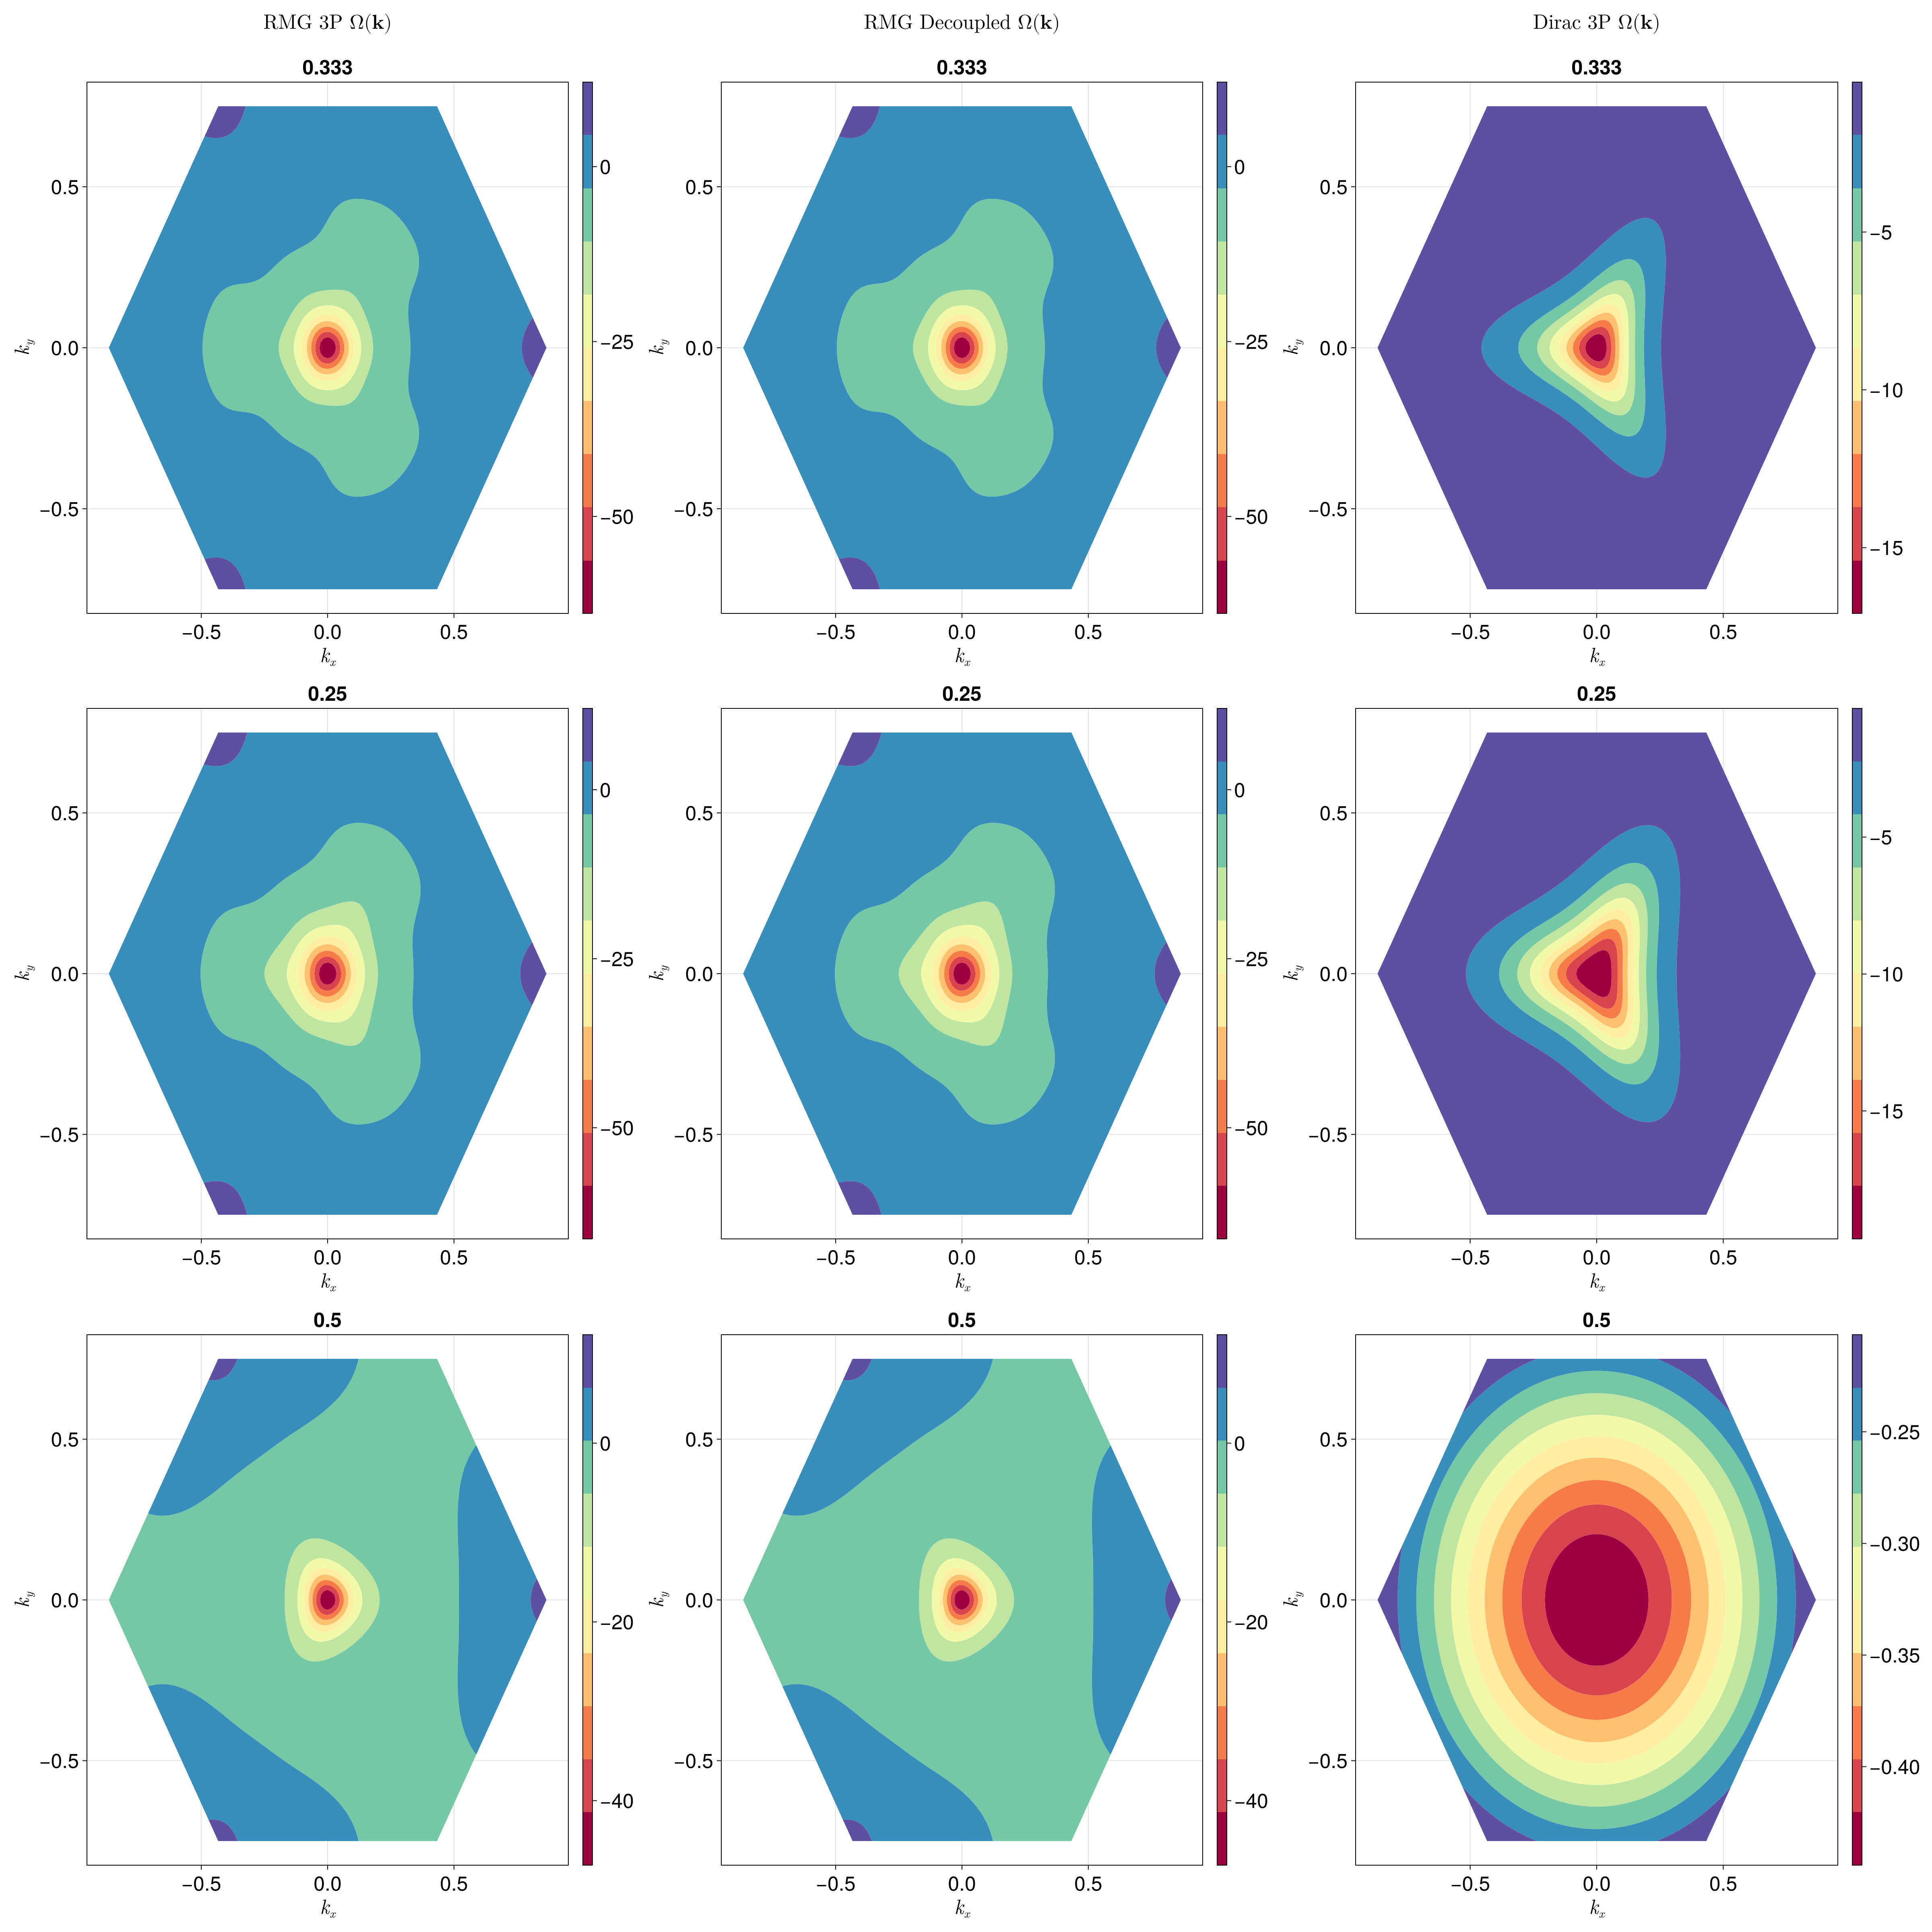

In [196]:
rmg_decoupled_comp(pd, w, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha_list)

<font size="12">Decoupling mid-patch</font>